# Дискретная случайная величина и его распределение

Сформируем дискретную СВ, определив множество возможных значений и вероятности их выпадения в массивах `X` и `p`. Соответствие между элементами `X` и `p` определяют закон распределения данной СВ. Сумма всех вероятностей в `p`, очевидно, должна равняться 1, так как при любом испытании вероятность выпадения одного из возможных значений `X` равна 1. Данная СВ имеет 9 возможных значений. Значение `p[i]` определяет вероятность выпадения значения `X[i]`:

In [3]:
import numpy as np

X = np.array([ -3,  -2,  -1,   0,   1,   2,   3,   4,   5])
p = np.array([.05, .06, .13, .24, .06, .15, .14, .08, .09])

print(f"{len(X) = }, {len(p) = }, {sum(p) = }")

len(X) = 9, len(p) = 9, sum(p) = np.float64(1.0)


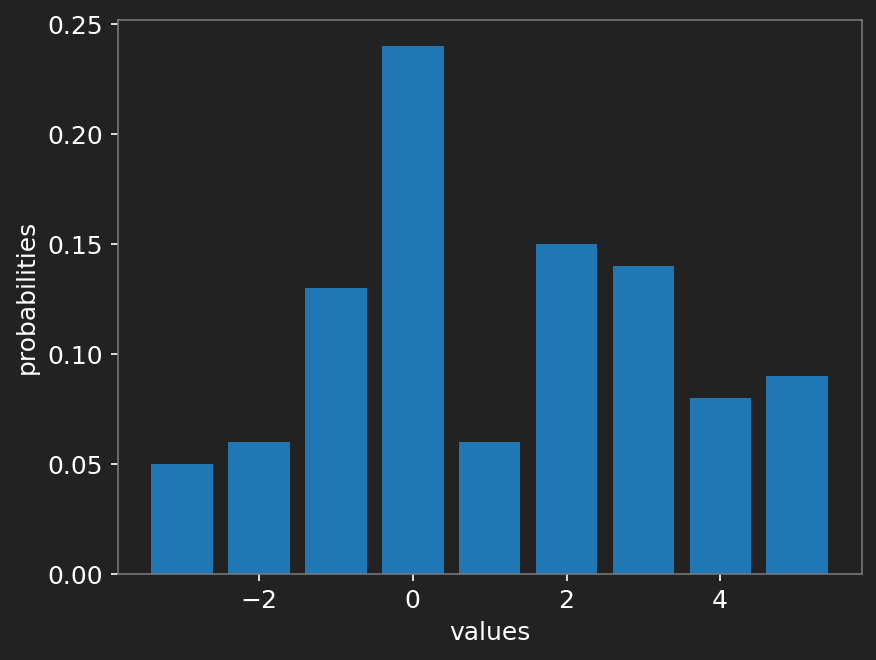

In [4]:
import matplotlib.pyplot as plt

plt.style.use("ordevoir-dark")
plt.bar(X, p)
plt.xlabel('values')
plt.ylabel('probabilities')
plt.show()

# PFM

In [5]:
def pmf(n, X, p):
    index = None
    for i in range(len(X)):
        if X[i] == n:
            index = i
            break
    return 0 if index is None else p[index]

print(pmf(-1, X, p))

0.13


# CDF Дискретной случайной величины

In [6]:
def cdf(x, X, p):
    probability = 0
    for i in range(len(X)):
        if X[i] < x:
            probability += p[i]
    return probability

print(cdf(5, X, p))

0.91


values = array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8])
cdf_sequence = array([0.  , 0.  , 0.  , 0.05, 0.11, 0.24, 0.48, 0.54, 0.69, 0.83, 0.91,
       1.  , 1.  , 1.  ])


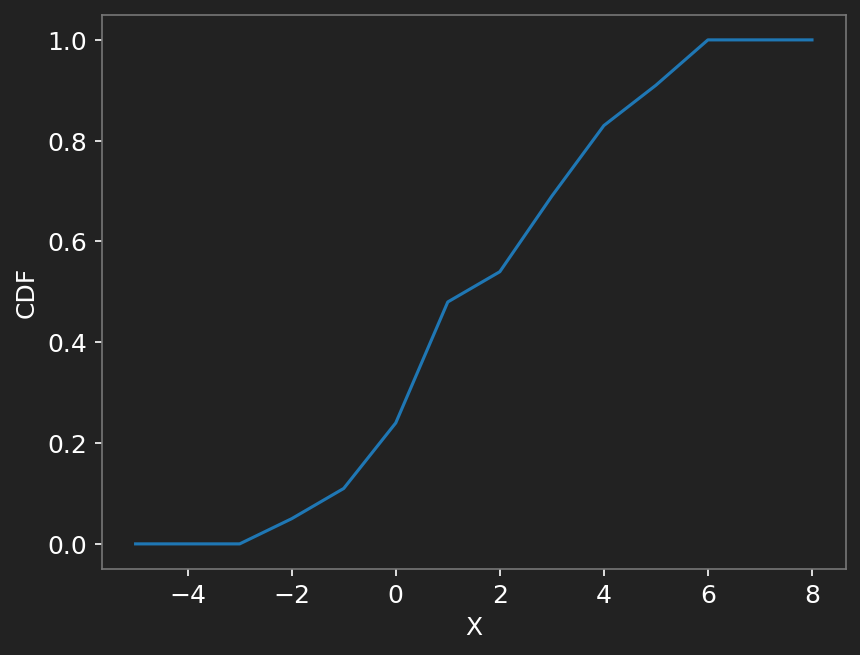

In [8]:
values = np.arange(-5, 9)
cdf_sequence = np.zeros(14)

for i in range(len(values)):
    c = cdf(values[i], X, p)
    cdf_sequence[i] = c

plt.plot(values, cdf_sequence)
plt.xlabel("X")
plt.ylabel("CDF")
print(f"{values = }\n{cdf_sequence = }")
plt.show()

# CDF Непрерывной случайной величины

Пусть функция распределения задана сигмоидой c $\alpha = 0.1$. В этом случае функция распределения определена на всей числовой прямой, и является всюду дифференцируемой.

Визуализируем CDF логистического распределения на отрезке $[-100, 100]$:

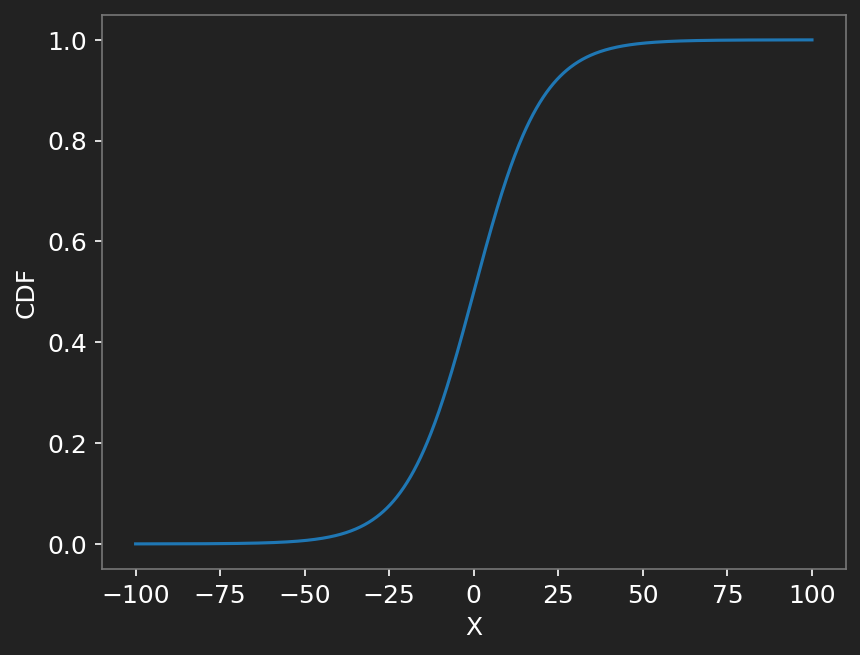

In [9]:
def sigmoid(x, alpha=0.1):
    return 1 / (1 + np.exp(-alpha * x))

segment = np.linspace(-100, 100, 1000)
cdf_sequence = np.zeros_like(segment)

for i in range(len(segment)):
    cdf_sequence[i] = sigmoid(segment[i])

plt.plot(segment, cdf_sequence)
plt.xlabel('X')
plt.ylabel('CDF')
plt.show()

# PDF

Напишем функцию `deriv_sigmoid`, которая возвращает значение производной сигмоиды в точке `x`. Тогда мы сможем получить значения плотности вероятности на рассматриваемом отрезке `segment`:

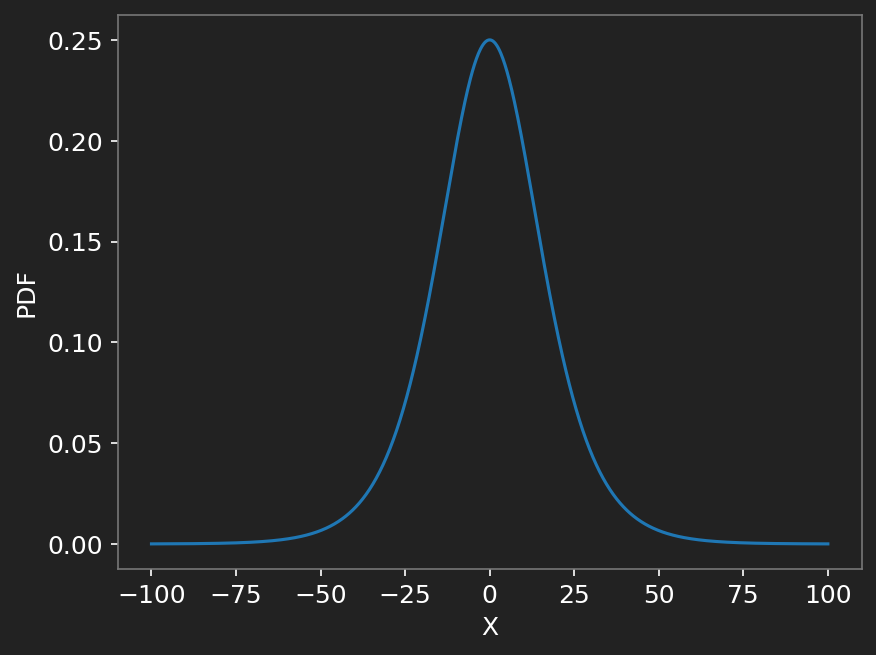

In [10]:
def deriv_sigmoid(x, alpha=0.1):
    return sigmoid(x, alpha) * (1 - sigmoid(x, alpha))

pdf = deriv_sigmoid

pdf = np.zeros_like(segment)
for i in range(len(segment)):
    pdf[i] = deriv_sigmoid(segment[i])

plt.plot(segment, pdf)
plt.xlabel('X')
plt.ylabel('PDF')
plt.show()